# Study Case

## How Does a Bike-Share Navigate Speedy Success?

## Tentang Perusahaan
Pada tahun 2016, Cyclistic meluncurkan layanan berbagi sepeda yang sukses. Sejak itu, program ini telah berkembang menjadi armada 5.824 sepeda yang dilacak secara geografis dan terkunci ke dalam jaringan 692 stasiun di seluruh Chicago. Sepeda-sepeda tersebut dapat dibuka dari satu stasiun dan dikembalikan ke stasiun lain dalam sistem kapan saja.

Hingga saat ini, strategi pemasaran Cyclistic bergantung pada membangun kesadaran umum dan menarik segmen konsumen yang luas. Salah satu pendekatan yang membantu mencapai hal ini adalah fleksibilitas rencana harga mereka: tiket perjalanan tunggal, tiket harian penuh, dan keanggotaan tahunan. Pelanggan yang membeli tiket perjalanan tunggal atau tiket harian disebut pengendara sesekali. Pelanggan yang membeli keanggotaan tahunan disebut anggota Cyclistic.

Analis keuangan Cyclistic menyimpulkan bahwa anggota tahunan jauh lebih menguntungkan daripada pengendara sesekali. Meskipun fleksibilitas harga membantu Cyclistic menarik lebih banyak pelanggan, Moreno percaya bahwa memaksimalkan jumlah anggota tahunan akan menjadi kunci pertumbuhan di masa depan. Alih-alih membuat kampanye pemasaran yang menargetkan pelanggan baru secara keseluruhan, Moreno percaya ada peluang yang sangat baik untuk mengonversi pengendara sesekali menjadi anggota. Dia mencatat bahwa pengendara sesekali sudah sadar akan program Cyclistic dan telah memilih Cyclistic untuk kebutuhan mobilitas mereka.

Moreno memiliki tujuan yang jelas: Merancang strategi pemasaran yang bertujuan untuk mengonversi pengendara sesekali menjadi anggota tahunan. Namun, untuk melakukannya, tim analis pemasaran perlu memahami lebih baik bagaimana anggota tahunan dan pengendara sesekali berbeda, mengapa pengendara sesekali akan membeli keanggotaan, dan bagaimana media digital dapat memengaruhi taktik pemasaran mereka. Moreno dan timnya tertarik untuk menganalisis data perjalanan sepeda historis Cyclistic untuk mengidentifikasi tren.

## Rumusan Masalah

- Bagaimana perbedaan member tahunan dan casual riders dalam penggunaan sepeda Cyclistic?
- Mengapa casual riders akan membeli member tahunan?
- Bagaimana Cyclistic bisa menggunakan media digital untuk mempengaruhi casual riders membeli member tahunan?


Saya menggunakan 6 data yang mana merupakan data selama 6 bulan dari perusahan tersebut. Data yang diambil adalah data dari bulan Mei 2022 sampai Oktober 2022

In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [133]:
## Loading data
df1 = pd.read_csv("2205-tripdata.csv")
df2 = pd.read_csv("2206-tripdata.csv")
df3 = pd.read_csv("2207-tripdata.csv")
df4 = pd.read_csv("2208-tripdata.csv")
df5 = pd.read_csv("2209-tripdata.csv")
df6 = pd.read_csv("2210-tripdata.csv")

## Untuk 5 cell ke bawah, saya hanya melakukan pengecekan untuk setiap dataframe

In [134]:
df1.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,EC2DE40644C6B0F4,classic_bike,2022-05-23 23:06:58,2022-05-23 23:40:19,Wabash Ave & Grand Ave,TA1307000117,Halsted St & Roscoe St,TA1309000025,41.891466,-87.626761,41.943670,-87.648950,member
1,1C31AD03897EE385,classic_bike,2022-05-11 08:53:28,2022-05-11 09:31:22,DuSable Lake Shore Dr & Monroe St,13300,Field Blvd & South Water St,15534,41.880958,-87.616743,41.886349,-87.617517,member
2,1542FBEC830415CF,classic_bike,2022-05-26 18:36:28,2022-05-26 18:58:18,Clinton St & Madison St,TA1305000032,Wood St & Milwaukee Ave,13221,41.882242,-87.641066,41.907655,-87.672552,member
3,6FF59852924528F8,classic_bike,2022-05-10 07:30:07,2022-05-10 07:38:49,Clinton St & Madison St,TA1305000032,Clark St & Randolph St,TA1305000030,41.882242,-87.641066,41.884576,-87.631890,member
4,483C52CAAE12E3AC,classic_bike,2022-05-10 17:31:56,2022-05-10 17:36:57,Clinton St & Madison St,TA1305000032,Morgan St & Lake St,TA1306000015,41.882242,-87.641066,41.885779,-87.651025,member


In [135]:
df2.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,600CFD130D0FD2A4,electric_bike,2022-06-30 17:27:53,2022-06-30 17:35:15,NaN,NaN,NaN,NaN,41.89,-87.62,41.91,-87.62,casual
1,F5E6B5C1682C6464,electric_bike,2022-06-30 18:39:52,2022-06-30 18:47:28,NaN,NaN,NaN,NaN,41.91,-87.62,41.93,-87.63,casual
2,B6EB6D27BAD771D2,electric_bike,2022-06-30 11:49:25,2022-06-30 12:02:54,NaN,NaN,NaN,NaN,41.91,-87.65,41.89,-87.61,casual
3,C9C320375DE1D5C6,electric_bike,2022-06-30 11:15:25,2022-06-30 11:19:43,NaN,NaN,NaN,NaN,41.80,-87.66,41.80,-87.65,casual
4,56C055851023BE98,electric_bike,2022-06-29 23:36:50,2022-06-29 23:45:17,NaN,NaN,NaN,NaN,41.91,-87.63,41.93,-87.64,casual


In [136]:
df3.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,954144C2F67B1932,classic_bike,2022-07-05 08:12:47,2022-07-05 08:24:32,Ashland Ave & Blackhawk St,13224,Kingsbury St & Kinzie St,KA1503000043,41.907066,-87.667252,41.889177,-87.638506,member
1,292E027607D218B6,classic_bike,2022-07-26 12:53:38,2022-07-26 12:55:31,Buckingham Fountain (Temp),15541,Michigan Ave & 8th St,623,41.869621,-87.623981,41.872773,-87.623981,casual
2,57765852588AD6E0,classic_bike,2022-07-03 13:58:49,2022-07-03 14:06:32,Buckingham Fountain (Temp),15541,Michigan Ave & 8th St,623,41.869621,-87.623981,41.872773,-87.623981,casual
3,B5B6BE44314590E6,classic_bike,2022-07-31 17:44:21,2022-07-31 18:42:50,Buckingham Fountain (Temp),15541,Woodlawn Ave & 55th St,TA1307000164,41.869621,-87.623981,41.795264,-87.596471,casual
4,A4C331F2A00E79E0,classic_bike,2022-07-13 19:49:06,2022-07-13 20:15:24,Wabash Ave & Grand Ave,TA1307000117,Sheffield Ave & Wellington Ave,TA1307000052,41.891466,-87.626761,41.936253,-87.652662,member


In [137]:
df4.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,550CF7EFEAE0C618,electric_bike,2022-08-07 21:34:15,2022-08-07 21:41:46,NaN,NaN,NaN,NaN,41.93,-87.69,41.94,-87.72,casual
1,DAD198F405F9C5F5,electric_bike,2022-08-08 14:39:21,2022-08-08 14:53:23,NaN,NaN,NaN,NaN,41.89,-87.64,41.92,-87.64,casual
2,E6F2BC47B65CB7FD,electric_bike,2022-08-08 15:29:50,2022-08-08 15:40:34,NaN,NaN,NaN,NaN,41.97,-87.69,41.97,-87.66,casual
3,F597830181C2E13C,electric_bike,2022-08-08 02:43:50,2022-08-08 02:58:53,NaN,NaN,NaN,NaN,41.94,-87.65,41.97,-87.69,casual
4,0CE689BB4E313E8D,electric_bike,2022-08-07 20:24:06,2022-08-07 20:29:58,NaN,NaN,NaN,NaN,41.85,-87.65,41.84,-87.66,casual


In [138]:
df5.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,5156990AC19CA285,electric_bike,2022-09-01 08:36:22,2022-09-01 08:39:05,NaN,NaN,California Ave & Milwaukee Ave,13084,41.93,-87.69,41.922695,-87.697153,casual
1,E12D4A16BF51C274,electric_bike,2022-09-01 17:11:29,2022-09-01 17:14:45,NaN,NaN,NaN,NaN,41.87,-87.62,41.870000,-87.620000,casual
2,A02B53CD7DB72DD7,electric_bike,2022-09-01 17:15:50,2022-09-01 17:16:12,NaN,NaN,NaN,NaN,41.87,-87.62,41.870000,-87.620000,casual
3,C82E05FEE872DF11,electric_bike,2022-09-01 09:00:28,2022-09-01 09:10:32,NaN,NaN,NaN,NaN,41.93,-87.69,41.940000,-87.670000,casual
4,4DEEB4550A266AE1,electric_bike,2022-09-01 07:30:11,2022-09-01 07:32:36,NaN,NaN,NaN,NaN,41.92,-87.73,41.920000,-87.730000,casual


In [139]:
df6.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,A50255C1E17942AB,classic_bike,2022-10-14 17:13:30,2022-10-14 17:19:39,Noble St & Milwaukee Ave,13290,Larrabee St & Division St,KA1504000079,41.900680,-87.662600,41.903486,-87.643353,member
1,DB692A70BD2DD4E3,electric_bike,2022-10-01 16:29:26,2022-10-01 16:49:06,Damen Ave & Charleston St,13288,Damen Ave & Cullerton St,13089,41.920037,-87.677937,41.854967,-87.675700,casual
2,3C02727AAF60F873,electric_bike,2022-10-19 18:55:40,2022-10-19 19:03:30,Hoyne Ave & Balmoral Ave,655,Western Ave & Leland Ave,TA1307000140,41.979879,-87.681902,41.966400,-87.688704,member
3,47E653FDC2D99236,electric_bike,2022-10-31 07:52:36,2022-10-31 07:58:49,Rush St & Cedar St,KA1504000133,Orleans St & Chestnut St (NEXT Apts),620,41.902274,-87.627692,41.898203,-87.637536,member
4,8B5407BE535159BF,classic_bike,2022-10-13 18:41:03,2022-10-13 19:26:18,900 W Harrison St,13028,Adler Planetarium,13431,41.874754,-87.649807,41.866095,-87.607267,casual


In [140]:
## Melakukan penggabugan data selama 6 bulan menjadi satu dataframe
df = pd.concat([df1,df2,df3,df4,df5,df6])

In [141]:
## Melihat jumlah kolom dan baris pada dataframe baru
df.shape

(4273506, 13)

In [142]:
## Melihat nama-nama kolom dari dataframe
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')

In [143]:
## Melihat informasi kolom pada dataframe seperti jumlah baris null dan tipe data dari tiap kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4273506 entries, 0 to 558684
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 456.5+ MB


In [144]:
## Melihat jumlah baris bernilai Null pada setiap kolom
df.isna().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    598851
start_station_id      598851
end_station_name      642598
end_station_id        642598
start_lat                  0
start_lng                  0
end_lat                 4754
end_lng                 4754
member_casual              0
dtype: int64

In [145]:
## Melakukan penghapusan baris yang memiliki nilai null pada dataframe
df.dropna(inplace=True)

Penghapusan data null dilakukan karena data yang bernilai null berjumlah kurang dari 30% keseluruhan data, jadi tidak akan berpengaruh besar untuk tujuan analisis 

In [146]:
## Data sudah tidak memiliki nilai null
df.isnull().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
dtype: int64

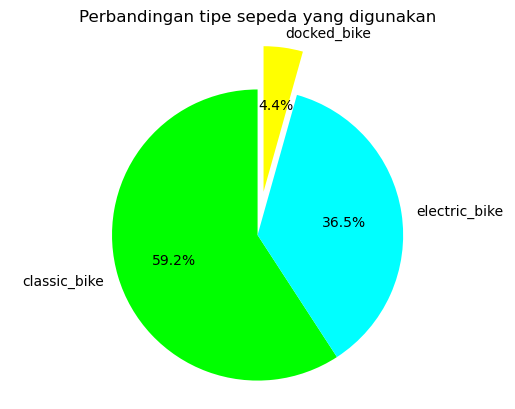

In [147]:
## Mengunpulkan data untuk tipe sepeda yang digunakan
tipe_sepeda = df['rideable_type']
tipe_sepeda

## Mengambil jumlah total tiap sepeda yang digunakan
counts_type = tipe_sepeda.value_counts()

## Membuat pie chart
explode_list =[0,0,0.3]
color_list = ['lime','cyan','yellow']
plt.pie(counts_type, labels= counts_type.index, autopct = '%1.1f%%', explode =explode_list, colors = color_list, startangle=90)
plt.title("Perbandingan tipe sepeda yang digunakan")
plt.axis('equal')
plt.show()

In [148]:
## Melihat jumlah member tahunan dan casual driver
df['member_casual'].value_counts()

member    1853988
casual    1466326
Name: member_casual, dtype: int64

In [149]:
df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,EC2DE40644C6B0F4,classic_bike,2022-05-23 23:06:58,2022-05-23 23:40:19,Wabash Ave & Grand Ave,TA1307000117,Halsted St & Roscoe St,TA1309000025,41.891466,-87.626761,41.943670,-87.648950,member
1,1C31AD03897EE385,classic_bike,2022-05-11 08:53:28,2022-05-11 09:31:22,DuSable Lake Shore Dr & Monroe St,13300,Field Blvd & South Water St,15534,41.880958,-87.616743,41.886349,-87.617517,member
2,1542FBEC830415CF,classic_bike,2022-05-26 18:36:28,2022-05-26 18:58:18,Clinton St & Madison St,TA1305000032,Wood St & Milwaukee Ave,13221,41.882242,-87.641066,41.907655,-87.672552,member
3,6FF59852924528F8,classic_bike,2022-05-10 07:30:07,2022-05-10 07:38:49,Clinton St & Madison St,TA1305000032,Clark St & Randolph St,TA1305000030,41.882242,-87.641066,41.884576,-87.631890,member
4,483C52CAAE12E3AC,classic_bike,2022-05-10 17:31:56,2022-05-10 17:36:57,Clinton St & Madison St,TA1305000032,Morgan St & Lake St,TA1306000015,41.882242,-87.641066,41.885779,-87.651025,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
558680,BC3BFA659C9AB6F1,classic_bike,2022-10-30 01:41:29,2022-10-30 01:57:16,Clifton Ave & Armitage Ave,TA1307000163,Lincoln Ave & Roscoe St*,chargingstx5,41.918216,-87.656936,41.943350,-87.670668,casual
558681,ACD65450291CF95F,classic_bike,2022-10-30 01:41:54,2022-10-30 01:57:09,Clifton Ave & Armitage Ave,TA1307000163,Lincoln Ave & Roscoe St*,chargingstx5,41.918216,-87.656936,41.943350,-87.670668,casual
558682,4AAC03D1438E97CA,classic_bike,2022-10-15 09:34:11,2022-10-15 10:03:21,Sedgwick St & North Ave,TA1307000038,Wabash Ave & Grand Ave,TA1307000117,41.911386,-87.638677,41.891466,-87.626761,casual
558683,8E6F3F29785E5D40,classic_bike,2022-10-09 10:21:34,2022-10-09 10:43:45,Sedgwick St & North Ave,TA1307000038,Damen Ave & Clybourn Ave,13271,41.911386,-87.638677,41.931931,-87.677856,member


In [150]:
## Mengubah tipe data kolom 'started_at' dan 'ended_at' dari object menjadi datetime

df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3320314 entries, 0 to 558684
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
dtypes: datetime64[ns](2), float64(4), object(7)
memory usage: 354.6+ MB


In [152]:
## Membuat kolom baru bernama "ride_length"

df['ride_length'] = df['ended_at'] - df['started_at']

In [153]:
## melihat apakah kolom baru sudah masuk ke dalam dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3320314 entries, 0 to 558684
Data columns (total 14 columns):
 #   Column              Dtype          
---  ------              -----          
 0   ride_id             object         
 1   rideable_type       object         
 2   started_at          datetime64[ns] 
 3   ended_at            datetime64[ns] 
 4   start_station_name  object         
 5   start_station_id    object         
 6   end_station_name    object         
 7   end_station_id      object         
 8   start_lat           float64        
 9   start_lng           float64        
 10  end_lat             float64        
 11  end_lng             float64        
 12  member_casual       object         
 13  ride_length         timedelta64[ns]
dtypes: datetime64[ns](2), float64(4), object(7), timedelta64[ns](1)
memory usage: 380.0+ MB


In [154]:
## Menampilkan dataframe untuk melihat nilai pada kolom 'ride_length'
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length
0,EC2DE40644C6B0F4,classic_bike,2022-05-23 23:06:58,2022-05-23 23:40:19,Wabash Ave & Grand Ave,TA1307000117,Halsted St & Roscoe St,TA1309000025,41.891466,-87.626761,41.943670,-87.648950,member,0 days 00:33:21
1,1C31AD03897EE385,classic_bike,2022-05-11 08:53:28,2022-05-11 09:31:22,DuSable Lake Shore Dr & Monroe St,13300,Field Blvd & South Water St,15534,41.880958,-87.616743,41.886349,-87.617517,member,0 days 00:37:54
2,1542FBEC830415CF,classic_bike,2022-05-26 18:36:28,2022-05-26 18:58:18,Clinton St & Madison St,TA1305000032,Wood St & Milwaukee Ave,13221,41.882242,-87.641066,41.907655,-87.672552,member,0 days 00:21:50
3,6FF59852924528F8,classic_bike,2022-05-10 07:30:07,2022-05-10 07:38:49,Clinton St & Madison St,TA1305000032,Clark St & Randolph St,TA1305000030,41.882242,-87.641066,41.884576,-87.631890,member,0 days 00:08:42
4,483C52CAAE12E3AC,classic_bike,2022-05-10 17:31:56,2022-05-10 17:36:57,Clinton St & Madison St,TA1305000032,Morgan St & Lake St,TA1306000015,41.882242,-87.641066,41.885779,-87.651025,member,0 days 00:05:01


In [155]:
df_riders_time = pd.concat([df['member_casual'], df['ride_length']], axis=1)

In [156]:
df_riders_time

,member_casual,ride_length
0,member,0 days 00:33:21
1,member,0 days 00:37:54
2,member,0 days 00:21:50
3,member,0 days 00:08:42
4,member,0 days 00:05:01
...,...,...
558680,casual,0 days 00:15:47
558681,casual,0 days 00:15:15
558682,casual,0 days 00:29:10
558683,member,0 days 00:22:11


In [157]:
average_ride_length = df_riders_time.groupby('member_casual')['ride_length'].mean()
print(average_ride_length)

member_casual
casual   0 days 00:24:09.855451652
member   0 days 00:13:01.413934718
Name: ride_length, dtype: timedelta64[ns]


Dapat dilihat dari perhitungan di atas, untuk rata-rata total selama 6 bulan. Berdasarkan waktu penggunaan sepeda dari member tahunan dan casual riders, terlihat bahwa casual_riders memiliki nilai rata-rata penggunaan yang lebih tinggi dari member tahunan.

Hal ini mungkin disebabkan karena casual riders hanya beberapa kali melakukan penyewaan sepeda, sehingga mereka memanfaatkan waktu yang mereka punya untuk menggunakan sepeda, sehingga nilai rata-rata waktu penggunaan dari casual riders lebih tinggi.

Sedangkan untuk member tahunan, mereka sudah membeli member selama setahun, jadi mereka tidak akan mementingkan berapa lama mereka menggunakan sepeda, sehingga kapanpun mereka ingin berhenti mereka dapat berhenti.


## Melihat rata-rata waktu penggunaan sepeda pada setiap bulan

### May 2022

In [158]:
## Menghapus nilai null yang ada pada dataframe df1
df1.dropna(inplace=True)

## Mengubah tipe data kolom 'started_at' dan 'ended_at' dari object menjadi datetime
df1['started_at'] = pd.to_datetime(df1['started_at'])
df1['ended_at'] = pd.to_datetime(df1['ended_at'])

## Membuat kolom baru bernama "ride_length"
df1['ride_length'] = df1['ended_at'] - df1['started_at']

## Menggabungkan kolom 'member_casual' dengan kolom 'ride_length'
df1_riders_time = pd.concat([df1['member_casual'], df1['ride_length']], axis=1)

## Menghitung rata-rata dari member tahunan dan casual riders
df1_average_ride_length = pd.DataFrame(df1_riders_time.groupby('member_casual')['ride_length'].mean())
df1_average_ride_length

,ride_length
member_casual,
casual,0 days 00:27:42.287328714
member,0 days 00:13:18.049606976


### June 2022

In [159]:
## Menghapus nilai null yang ada pada dataframe df2
df2.dropna(inplace=True)

## Mengubah tipe data kolom 'started_at' dan 'ended_at' dari object menjadi datetime
df2['started_at'] = pd.to_datetime(df2['started_at'])
df2['ended_at'] = pd.to_datetime(df2['ended_at'])

## Membuat kolom baru bernama "ride_length"
df2['ride_length'] = df2['ended_at'] - df2['started_at']

## Menggabungkan kolom 'member_casual' dengan kolom 'ride_length'
df2_riders_time = pd.concat([df2['member_casual'], df2['ride_length']], axis=1)

## Menghitung rata-rata dari member tahunan dan casual riders
df2_average_ride_length = pd.DataFrame(df2_riders_time.groupby('member_casual')['ride_length'].mean())
df2_average_ride_length



,ride_length
member_casual,
casual,0 days 00:25:01.110289384
member,0 days 00:13:40.988351478


### July 2022

In [160]:
## Menghapus nilai null yang ada pada dataframe df3
df3.dropna(inplace=True)

## Mengubah tipe data kolom 'started_at' dan 'ended_at' dari object menjadi datetime
df3['started_at'] = pd.to_datetime(df3['started_at'])
df3['ended_at'] = pd.to_datetime(df3['ended_at'])

## Membuat kolom baru bernama "ride_length"
df3['ride_length'] = df3['ended_at'] - df3['started_at']

## Menggabungkan kolom 'member_casual' dengan kolom 'ride_length'
df3_riders_time = pd.concat([df3['member_casual'], df3['ride_length']], axis=1)

## Menghitung rata-rata dari member tahunan dan casual riders
df3_average_ride_length = pd.DataFrame(df3_riders_time.groupby('member_casual')['ride_length'].mean())
df3_average_ride_length



,ride_length
member_casual,
casual,0 days 00:25:05.553359556
member,0 days 00:13:30.177307085


### August 2022

In [161]:
## Menghapus nilai null yang ada pada dataframe df4
df4.dropna(inplace=True)

## Mengubah tipe data kolom 'started_at' dan 'ended_at' dari object menjadi datetime
df4['started_at'] = pd.to_datetime(df4['started_at'])
df4['ended_at'] = pd.to_datetime(df4['ended_at'])

## Membuat kolom baru bernama "ride_length"
df4['ride_length'] = df4['ended_at'] - df4['started_at']

## Menggabungkan kolom 'member_casual' dengan kolom 'ride_length'
df4_riders_time = pd.concat([df4['member_casual'], df4['ride_length']], axis=1)

## Menghitung rata-rata dari member tahunan dan casual riders
df4_average_ride_length = pd.DataFrame(df4_riders_time.groupby('member_casual')['ride_length'].mean())
df4_average_ride_length



,ride_length
member_casual,
casual,0 days 00:23:17.030996501
member,0 days 00:13:06.347540494


### September 2022

In [162]:
## Menghapus nilai null yang ada pada dataframe df5
df5.dropna(inplace=True)

## Mengubah tipe data kolom 'started_at' dan 'ended_at' dari object menjadi datetime
df5['started_at'] = pd.to_datetime(df5['started_at'])
df5['ended_at'] = pd.to_datetime(df5['ended_at'])

## Membuat kolom baru bernama "ride_length"
df5['ride_length'] = df5['ended_at'] - df5['started_at']

## Menggabungkan kolom 'member_casual' dengan kolom 'ride_length'
df5_riders_time = pd.concat([df5['member_casual'], df5['ride_length']], axis=1)

## Menghitung rata-rata dari member tahunan dan casual riders
df5_average_ride_length = pd.DataFrame(df5_riders_time.groupby('member_casual')['ride_length'].mean())
df5_average_ride_length



,ride_length
member_casual,
casual,0 days 00:21:48.227236720
member,0 days 00:12:37.311017407


### October 2022

In [163]:
## Menghapus nilai null yang ada pada dataframe df6
df6.dropna(inplace=True)

## Mengubah tipe data kolom 'started_at' dan 'ended_at' dari object menjadi datetime
df6['started_at'] = pd.to_datetime(df6['started_at'])
df6['ended_at'] = pd.to_datetime(df6['ended_at'])

## Membuat kolom baru bernama "ride_length"
df6['ride_length'] = df6['ended_at'] - df6['started_at']

## Menggabungkan kolom 'member_casual' dengan kolom 'ride_length'
df6_riders_time = pd.concat([df6['member_casual'], df6['ride_length']], axis=1)

## Menghitung rata-rata dari member tahunan dan casual riders
df6_average_ride_length = pd.DataFrame(df6_riders_time.groupby('member_casual')['ride_length'].mean())
df6_average_ride_length



,ride_length
member_casual,
casual,0 days 00:20:28.069328064
member,0 days 00:11:40.451873966


### Di bawah ini, saya mengambil nilai rata-rata waktu untuk **casual riders** dan menggabungkannya pada 1 dataframe untuk divisualisasi

In [164]:
## Membuat dataframe untuk nilai rata-rata casual riders pada df1
df1_casual = pd.DataFrame()
df1_casual.loc['casual','ride_length'] = df1_average_ride_length.loc['casual','ride_length']

## Membuat dataframe untuk nilai rata-rata casual riders pada df2
df2_casual = pd.DataFrame()
df2_casual.loc['casual','ride_length'] = df2_average_ride_length.loc['casual','ride_length']

## Membuat dataframe untuk nilai rata-rata casual riders pada df3
df3_casual = pd.DataFrame()
df3_casual.loc['casual','ride_length'] = df3_average_ride_length.loc['casual','ride_length']

## Membuat dataframe untuk nilai rata-rata casual riders pada df4
df4_casual = pd.DataFrame()
df4_casual.loc['casual','ride_length'] = df4_average_ride_length.loc['casual','ride_length']

## Membuat dataframe untuk nilai rata-rata casual riders pada df5
df5_casual = pd.DataFrame()
df5_casual.loc['casual','ride_length'] = df5_average_ride_length.loc['casual','ride_length']

## Membuat dataframe untuk nilai rata-rata casual riders pada df6
df6_casual = pd.DataFrame()
df6_casual.loc['casual','ride_length'] = df6_average_ride_length.loc['casual','ride_length']


In [165]:
## Menggabungkan nilai rata-rata waktu casual drivers
df_casual_merged = pd.concat([df1_casual, df3_casual, df3_casual, df4_casual, df5_casual, df6_casual ])

## Menampilkan nilai rata-rata waktu tiap bulan untuk casual_drivers
df_casual_merged

,ride_length
casual,0 days 00:27:42.287328714
casual,0 days 00:25:05.553359556
casual,0 days 00:25:05.553359556
casual,0 days 00:23:17.030996501
casual,0 days 00:21:48.227236720
casual,0 days 00:20:28.069328064


In [166]:
months = ['May', 'June', 'July', 'August', 'September', 'October']
df_casual_merged.index = months

# Menampilkan DataFrame dengan indeks baru
df_casual_merged

,ride_length
May,0 days 00:27:42.287328714
June,0 days 00:25:05.553359556
July,0 days 00:25:05.553359556
August,0 days 00:23:17.030996501
September,0 days 00:21:48.227236720
October,0 days 00:20:28.069328064


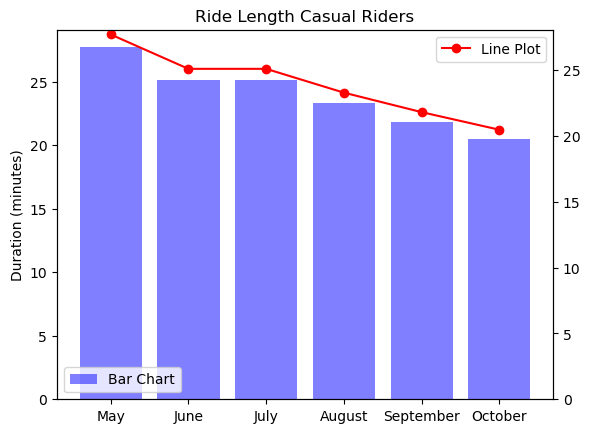

In [167]:
# Membuat figure dan axes
fig, ax1 = plt.subplots()

# Membuat bar chart
ax1.bar(df_casual_merged.index, df_casual_merged['ride_length'].dt.total_seconds() / 60, color='blue', alpha=0.5)
ax1.set_ylabel('Duration (minutes)')

# Membuat line plot
ax2 = ax1.twinx()
ax2.plot(df_casual_merged.index, df_casual_merged['ride_length'].dt.total_seconds() / 60, marker='o', color='red')

# Aligning y-axis limits for both plots
ax1.set_ylim(bottom=0)
ax2.set_ylim(bottom=0)

# Menampilkan judul dan label sumbu x
plt.title('Ride Length Casual Riders')
plt.xlabel('Month')

# Menampilkan legend
ax1.legend(['Bar Chart'], loc='lower left')
ax2.legend(['Line Plot'], loc='upper right')

# Menampilkan plot
plt.show()


### Di bawah ini, saya mengambil nilai rata-rata waktu untuk **casual riders** dan menggabungkannya pada 1 dataframe untuk divisualisasi

In [168]:
## Membuat dataframe untuk nilai rata-rata member riders pada df1
df1_member = pd.DataFrame()
df1_member.loc['member','ride_length'] = df1_average_ride_length.loc['member','ride_length']

## Membuat dataframe untuk nilai rata-rata member riders pada df2
df2_member = pd.DataFrame()
df2_member.loc['member','ride_length'] = df2_average_ride_length.loc['member','ride_length']

## Membuat dataframe untuk nilai rata-rata member riders pada df3
df3_member = pd.DataFrame()
df3_member.loc['member','ride_length'] = df3_average_ride_length.loc['member','ride_length']

## Membuat dataframe untuk nilai rata-rata member riders pada df4
df4_member = pd.DataFrame()
df4_member.loc['member','ride_length'] = df4_average_ride_length.loc['member','ride_length']

## Membuat dataframe untuk nilai rata-rata member riders pada df5
df5_member = pd.DataFrame()
df5_member.loc['member','ride_length'] = df5_average_ride_length.loc['member','ride_length']

## Membuat dataframe untuk nilai rata-rata member riders pada df6
df6_member = pd.DataFrame()
df6_member.loc['member','ride_length'] = df6_average_ride_length.loc['member','ride_length']



In [169]:
## Menggabungkan nilai rata-rata waktu member drivers
df_member_merged = pd.concat([df1_member, df3_member, df3_member, df4_member, df5_member, df6_member ])

## Menampilkan nilai rata-rata waktu tiap bulan untuk member_drivers
df_member_merged


,ride_length
member,0 days 00:13:18.049606976
member,0 days 00:13:30.177307085
member,0 days 00:13:30.177307085
member,0 days 00:13:06.347540494
member,0 days 00:12:37.311017407
member,0 days 00:11:40.451873966


In [170]:
months = ['May', 'June', 'July', 'August', 'September', 'October']
df_member_merged.index = months

# Menampilkan DataFrame dengan indeks baru
df_member_merged


,ride_length
May,0 days 00:13:18.049606976
June,0 days 00:13:30.177307085
July,0 days 00:13:30.177307085
August,0 days 00:13:06.347540494
September,0 days 00:12:37.311017407
October,0 days 00:11:40.451873966


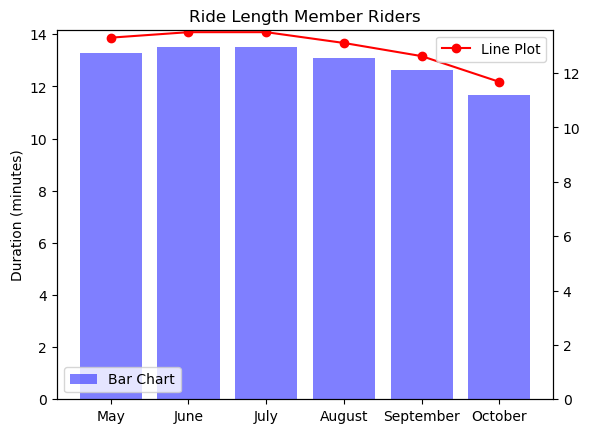

In [171]:
# Membuat figure dan axes
fig, ax1 = plt.subplots()

# Membuat bar chart
ax1.bar(df_member_merged.index, df_member_merged['ride_length'].dt.total_seconds() / 60, color='blue', alpha=0.5)
ax1.set_ylabel('Duration (minutes)')

# Membuat line plot
ax2 = ax1.twinx()
ax2.plot(df_member_merged.index, df_member_merged['ride_length'].dt.total_seconds() / 60, marker='o', color='red')

# Aligning y-axis limits for both plots
ax1.set_ylim(bottom=0)
ax2.set_ylim(bottom=0)

# Menampilkan judul dan label sumbu x
plt.title('Ride Length Member Riders')
plt.xlabel('Month')

# Menampilkan legend
ax1.legend(['Bar Chart'], loc='lower left')
ax2.legend(['Line Plot'], loc='upper right')

# Menampilkan plot
plt.show()